In [1]:
import numpy as np
import matplotlib.pyplot as plt
import hdrie.rekonstruksjon as rekons
import pytest

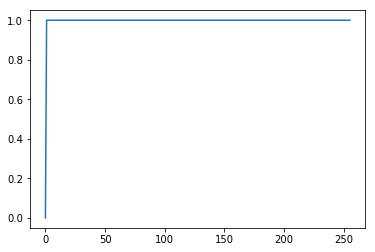

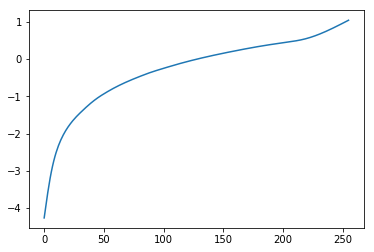

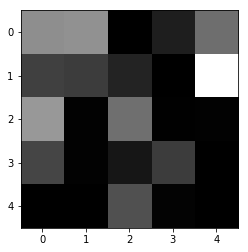

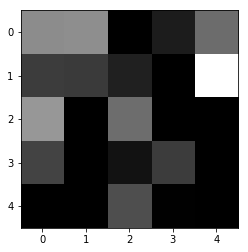

In [21]:
# Lag testdata (tilfeldig bilde + lineære eksponeringer).
orig_img = np.random.rand(5, 5) ** 3
eksp_tider = 2 ** np.arange(1, 5)
eksp_bilder = np.array(
    [(orig_img * 0.1 * dt * 255).clip(0, 255).astype(np.uint8) for dt in eksp_tider]
)

vekter = np.zeros(256)
vekter[1:256] = 1
plt.plot(vekter)

# Kall funksjonen for å generere
lg, _ = rekons.responskurve(eksp_bilder, eksp_tider, 10, 256, vekter)
plt.figure()
plt.plot(lg)
lE = rekons.irradians(eksp_bilder, eksp_tider, lg, 256)

plt.figure()
plt.imshow(orig_img, plt.cm.gray)
plt.figure()
plt.imshow(np.exp(lE), plt.cm.gray)

g = np.exp(lg)

dgdt = g[1:] - g[:-1]  # Enkeltderiverte til `g`.
dgdtt = dgdt[1:] - dgdt[:-1]  # Dobbeltderiverte til `g`.

# Siden `g` skal være lineær, så skal alle de dobbeltderiverte være null.
# Pga. at det blir noen unøyaktigheter rundt endene på `g`, så benytter vi
# kun sentrerte verdier i sammenlikningen.
senter = dgdtt[10:-30]